## Custom Functions with the Game of Life

### Generate the board

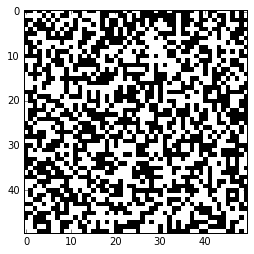

In [2]:
%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt

shape = (50, 50)
initial_board = tf.random_uniform(shape, minval=0, maxval=2, dtype=tf.int32)

with tf.Session() as sess:
    X = sess.run(initial_board)

plot = plt.imshow(X, cmap='Greys', interpolation='nearest')
plt.show()

## Updating the state of the board

In [3]:
import numpy as np
from scipy.signal import convolve2d

def update_board(X):
    # compute number of neighours
    N = convolve2d(X, np.ones((3, 3)), mode='same', boundary='wrap') - X
    
    # apply rues of the game
    X = (N == 3) | (X & (N == 2))
    
    return X

In [4]:
board = tf.placeholder(tf.int32, shape=shape, name='board')
board_update = tf.py_func(update_board, [board], [tf.int32])

In [5]:
with tf.Session() as sess:
    initial_board_values = sess.run(initial_board)
    X = sess.run(board_update, feed_dict={board: initial_board_values})[0]

UnimplementedError: Unsupported numpy type 5
	 [[Node: PyFunc_1 = PyFunc[Tin=[DT_INT32], Tout=[DT_INT32], token="pyfunc_1", _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_board_1_0)]]

Caused by op 'PyFunc_1', defined at:
  File "C:\Users\kjamy\Anaconda3\lib\runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\kjamy\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\kjamy\Anaconda3\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Users\kjamy\Anaconda3\lib\site-packages\traitlets\config\application.py", line 596, in launch_instance
    app.start()
  File "C:\Users\kjamy\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 442, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\kjamy\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\kjamy\Anaconda3\lib\site-packages\tornado\ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "C:\Users\kjamy\Anaconda3\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\kjamy\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\kjamy\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\kjamy\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\kjamy\Anaconda3\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\kjamy\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\kjamy\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\kjamy\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 391, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\kjamy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 199, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\kjamy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2723, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\kjamy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2825, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\kjamy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-8d546cf3ed00>", line 2, in <module>
    board_update = tf.py_func(update_board, [board], [tf.int32])
  File "C:\Users\kjamy\Anaconda3\lib\site-packages\tensorflow\python\ops\script_ops.py", line 192, in py_func
    input=inp, token=token, Tout=Tout, name=name)
  File "C:\Users\kjamy\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_script_ops.py", line 40, in _py_func
    name=name)
  File "C:\Users\kjamy\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "C:\Users\kjamy\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\kjamy\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

UnimplementedError (see above for traceback): Unsupported numpy type 5
	 [[Node: PyFunc_1 = PyFunc[Tin=[DT_INT32], Tout=[DT_INT32], token="pyfunc_1", _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_board_1_0)]]


In [24]:
import matplotlib.animation as animation
from IPython.display import HTML

def game_of_life(*args):
    X = update_board(X)
    plot.set_array(X)
    return plot

with tf.Session() as sess:
    X = sess.run(initial_board)
    ani = animation.FuncAnimation(fig, game_of_life, interval=200, blit=True)
    plt.show()    
        
    HTML(ani.to_html5_video())

RuntimeError: No MovieWriters available!